In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt #for plotting things
import os
from PIL import Image
#print(os.listdir("../input"))
 
# Keras Libraries
import keras
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.preprocessing.image import ImageDataGenerator, load_img

In [ ]:
mainDIR = os.listdir('/content/drive/MyDrive/SGP Project/xray')
print(mainDIR)
train_folder= '/content/drive/MyDrive/SGP Project/xray/train/'
val_folder = '/content/drive/MyDrive/SGP Project/xray/val/'
test_folder = '/content/drive/MyDrive/SGP Project/xray/test/'

['train', 'test', 'val']


In [ ]:
# train 
os.listdir(train_folder)
train_n = train_folder+'NORMAL/'
train_p = train_folder+'Tumor/'

493
normal picture title:  image(59).jpg
Tumor picture title: Y17.jpg


Text(0.5, 1.0, 'Tumor')

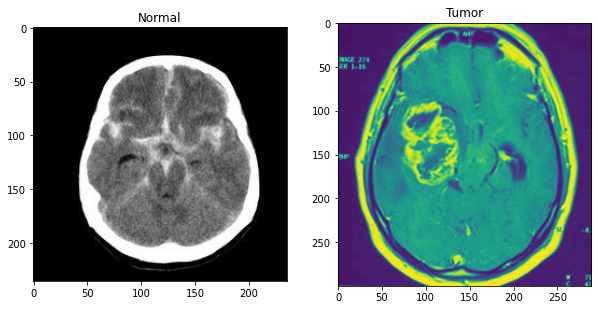

In [ ]:
# #Normal pic 
print(len(os.listdir(train_n)))
rand_norm= np.random.randint(0,len(os.listdir(train_n)))
norm_pic = os.listdir(train_n)[rand_norm]
print('normal picture title: ',norm_pic)

norm_pic_address = train_n+norm_pic

#Tumor
rand_p = np.random.randint(0,len(os.listdir(train_p))-1)

sic_pic =  os.listdir(train_p)[rand_norm]
sic_address = train_p+sic_pic
print('Tumor picture title:', sic_pic)

# Load the images
norm_load = Image.open(norm_pic_address)
sic_load = Image.open(sic_address)

#Let's plt these images
f = plt.figure(figsize= (10,6))
a1 = f.add_subplot(1,2,1)
img_plot = plt.imshow(norm_load)
a1.set_title('Normal')

a2 = f.add_subplot(1, 2, 2)
img_plot = plt.imshow(sic_load)
a2.set_title('Tumor')

In [ ]:
# let's build the CNN model
cnn = Sequential()
#Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu", input_shape=(64, 64, 3)))

#Pooling
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 2nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 2nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# 3nd Convolution
cnn.add(Conv2D(32, (3, 3), activation="relu"))

# 3nd Pooling layer
cnn.add(MaxPooling2D(pool_size = (2, 2)))

# Flatten the layer
cnn.add(Flatten())

# Fully Connected Layers
cnn.add(Dense(activation = 'relu', units = 128))
cnn.add(Dense(activation = 'sigmoid', units = 1))

# Compile the Neural network
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 32)         0

In [ ]:
num_of_test_samples = 200
batch_size = 32
# Fitting the CNN to the images
# The function ImageDataGenerator augments your image by iterating through image as your CNN is getting ready to process that image

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)  #Image normalization.

training_set = train_datagen.flow_from_directory('drive/My Drive/xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_set = test_datagen.flow_from_directory('drive/My Drive/xray/val/',
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary')

test_set = test_datagen.flow_from_directory('drive/My Drive/xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 253 images belonging to 2 classes.
Found 47 images belonging to 2 classes.
Found 253 images belonging to 2 classes.


In [ ]:
cnn_model = cnn.fit_generator(training_set,
                         steps_per_epoch = 7,
                         epochs = 8,
                         validation_data = validation_set,
                         validation_steps = 20)
test_accu = cnn.evaluate_generator(test_set,steps=20)
print('The testing accuracy is :',test_accu[1]*100, '%')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """


Epoch 1/8
7/7 [==============================] - ETA: 0s - loss: 0.6778 - accuracy: 0.5973

7/7 [==============================] - 41s 6s/step - loss: 0.6778 - accuracy: 0.5973 - val_loss: 0.6319 - val_accuracy: 0.6170
Epoch 2/8
7/7 [==============================] - 2s 308ms/step - loss: 0.6265 - accuracy: 0.6380
Epoch 3/8
7/7 [==============================] - 2s 318ms/step - loss: 0.5815 - accuracy: 0.7188
Epoch 4/8
7/7 [==============================] - 2s 325ms/step - loss: 0.5480 - accuracy: 0.7240
Epoch 5/8
7/7 [==============================] - 2s 330ms/step - loss: 0.5863 - accuracy: 0.6787
Epoch 6/8
7/7 [==============================] - 2s 318ms/step - loss: 0.5391 - accuracy: 0.7330
Epoch 7/8
7/7 [==============================] - 3s 359ms/step - loss: 0.5231 - accuracy: 0.7376
Epoch 8/8
7/7 [==============================] - 4s 532ms/step - loss: 0.5771 - accuracy: 0.7195


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  


The testing accuracy is : 79.0513813495636 %


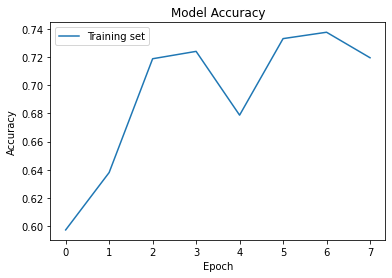

In [ ]:
# Accuracy 
plt.plot(cnn_model.history['accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Validation set'], loc='upper left')
plt.show()

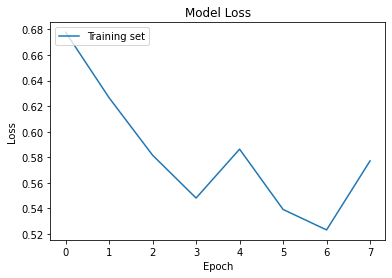

In [ ]:
# Loss 
plt.plot(cnn_model.history['loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training set', 'Test set'], loc='upper left')
plt.show()

In [ ]:
path_val_image = "/content/drive/MyDrive/xray/test/NORMAL/11 no.jpg" # copied path of the tumor X-ray image

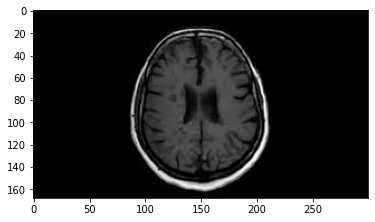

[[0.]]
Normal


In [ ]:
from keras.preprocessing import image
import matplotlib.image as mpimg
img = mpimg.imread(path_val_image)
plt.imshow(img)
plt.show()
img = image.load_img(path_val_image, target_size=(64, 64))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
classes = cnn.predict(x)
print(classes)
if classes>0.5:
  print("Tumor")
else:
  print("Normal")
    